In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
current_stock = pd.read_csv('../Proyecto/Data/Existencias.csv')
sales = pd.read_csv('../Proyecto/Data/FacturacionCorregida.csv',parse_dates=['Fecha'],dayfirst=True ,sep=';')
masterReferences = pd.read_csv('../Proyecto/Data/MaestroCorregido.csv', sep=';')
clasification = pd.read_csv('../Proyecto/Data/Clasificacion.csv')

In [3]:
current_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DEPARTAMENTO    941 non-null    object 
 1   SUBCATEGORIA    941 non-null    object 
 2   REF_Combinada   941 non-null    object 
 3   Referencia      941 non-null    object 
 4   Ext. 1 detalle  877 non-null    float64
 5   Ext. 2 detalle  75 non-null     float64
 6   Disp.           941 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 51.6+ KB


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36276 entries, 0 to 36275
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   C.O.                  36276 non-null  int64         
 1   Desc. C.O.            36276 non-null  object        
 2   REF_Combinada         36276 non-null  object        
 3   Nro documento         36276 non-null  object        
 4   Fecha                 36276 non-null  datetime64[ns]
 5   Cantidad inv.         36276 non-null  int64         
 6   Suma de Vlr_Bruto     36276 non-null  int64         
 7   Suma de Vlr_Subtotal  36276 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.2+ MB


In [5]:
masterReferences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item                       1285 non-null   int64  
 1   Desc. item                 1285 non-null   object 
 2   Desc. ext. 1 detalle       1235 non-null   object 
 3   Desc. ext. 2 detalle       466 non-null    object 
 4   Desc. tipo inventario      1285 non-null   object 
 5   ORIGEN                     1285 non-null   object 
 6   DEPARTAMENTO               1285 non-null   object 
 7   SUBCATEGORIA               1285 non-null   object 
 8   ESTILO                     1285 non-null   object 
 9   VIGENCIA                   1285 non-null   object 
 10  001-DESCRIPCION UNIFICADA  1285 non-null   object 
 11  001-ALTO EXHIBIDO          1285 non-null   float64
 12  001-ANCHO EXHIBIDO         1285 non-null   float64
 13  001-FONDO EXHIBIDO         1285 non-null   float

In [6]:
clasification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Vigencia   3 non-null      object
 1   Rango_Min  3 non-null      int64 
 2   Rango_Max  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


## Entendimiento ventas/inventario

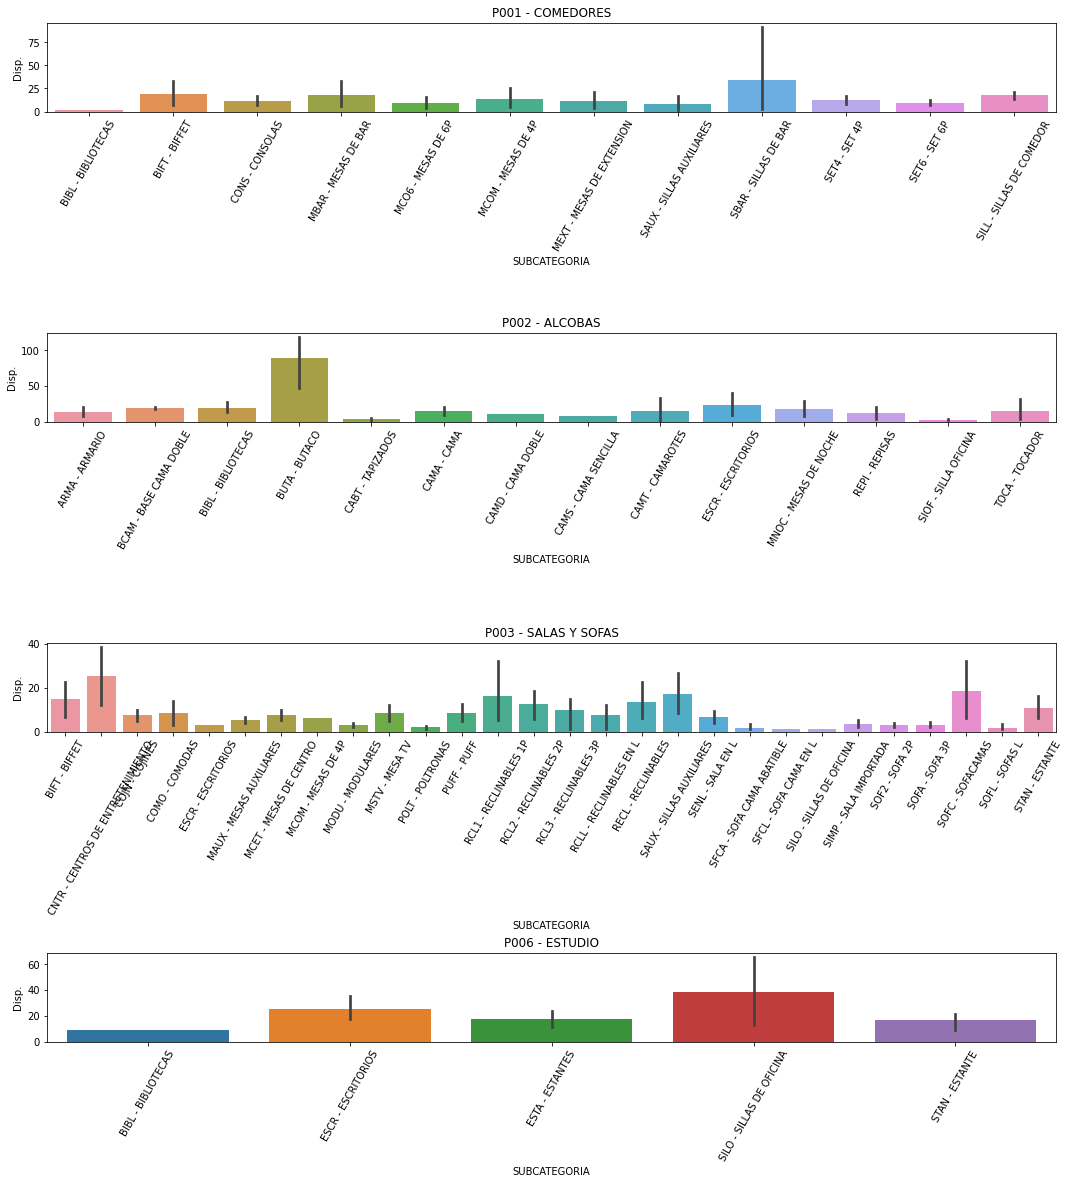

In [7]:
currDepartments = current_stock["DEPARTAMENTO"].unique()
currDepartments.sort(axis=0)
selectedSub = None
counter = 0
fig, axes = plt.subplots(len(currDepartments), 1,figsize=(20,20))
fig.tight_layout(pad=20.0)
plot = None
for i in currDepartments:
    selectedSub = current_stock[current_stock["DEPARTAMENTO"]==i]
    plot=sns.barplot(ax=axes[counter],x="SUBCATEGORIA", y="Disp.", data=selectedSub)
    plot.set(title=i)
    plt.setp(plot.get_xticklabels(), rotation=60)
    counter += 1

['P001 - COMEDORES' 'P002 - ALCOBAS' 'P003 - SALAS Y SOFAS'
 'P006 - ESTUDIO']


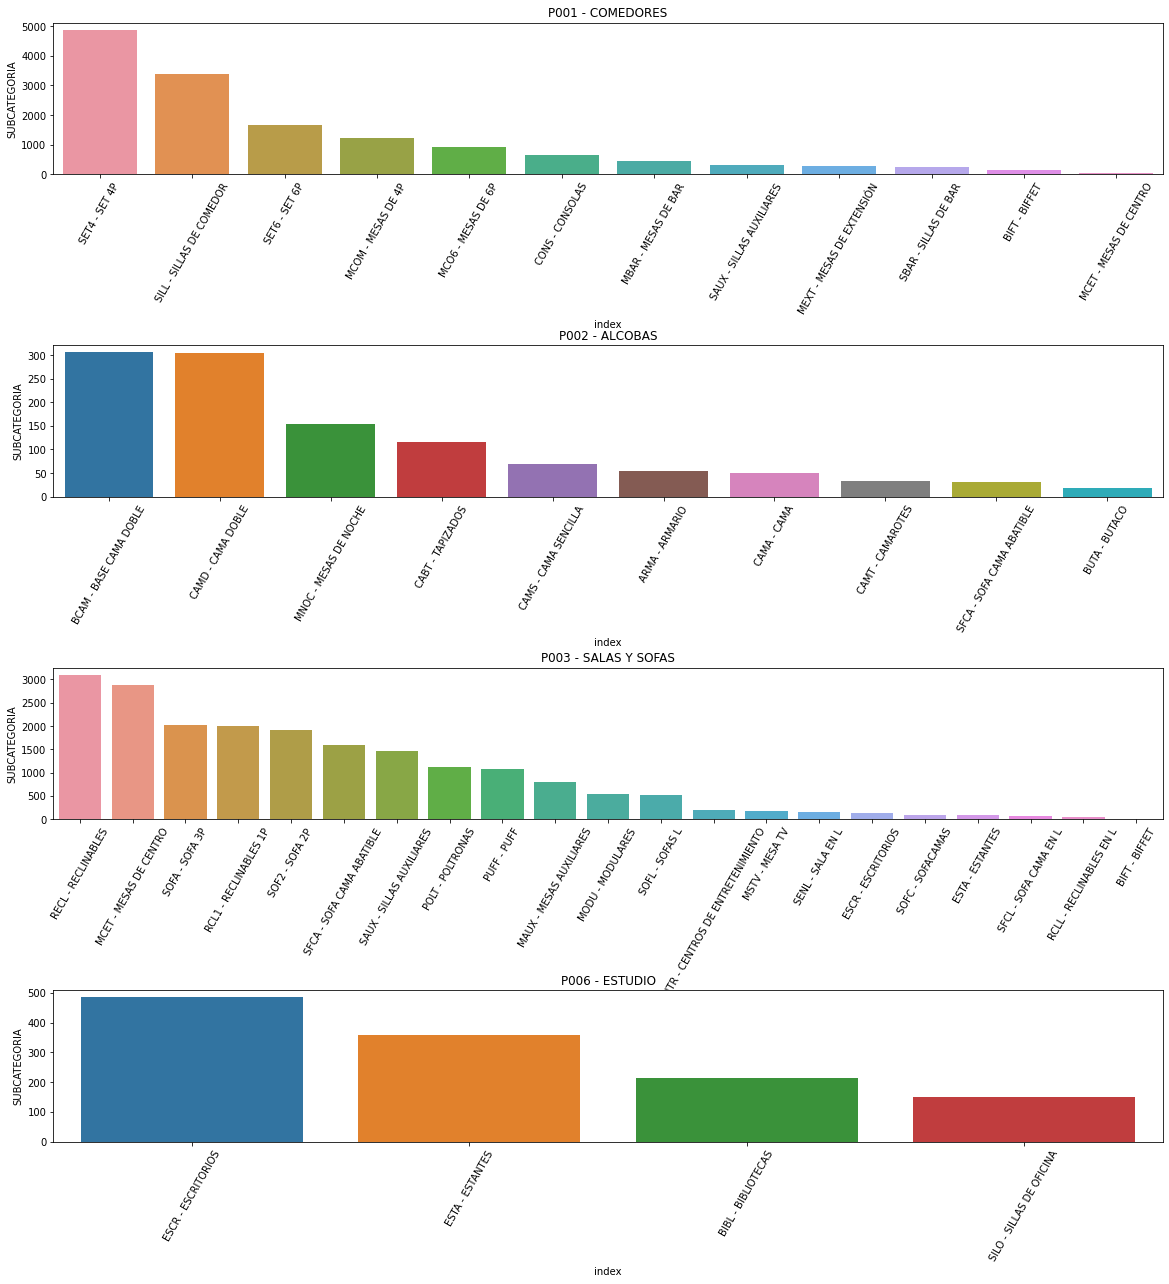

In [8]:
mergedDF = sales.merge(masterReferences, on='REF_Combinada')
departments = mergedDF["DEPARTAMENTO"].unique()
departments.sort(axis=0)
print(departments)
selectedSub = None
counter = 0
fig, axes = plt.subplots(len(departments), 1,figsize=(20,20))
fig.tight_layout(pad=15.0)
plot = None
for i in departments:
    selectedSub = mergedDF[mergedDF["DEPARTAMENTO"]==i]
    selectedSub = selectedSub["SUBCATEGORIA"].value_counts().reset_index()
    plot = sns.barplot(ax=axes[counter],x="index", y="SUBCATEGORIA", data=selectedSub)
    plot.set(title=i)
    plt.setp(plot.get_xticklabels(), rotation=60)
    counter += 1

## Entendimiento ventas pre-pos covis

<AxesSubplot:xlabel='Fecha', ylabel='0'>

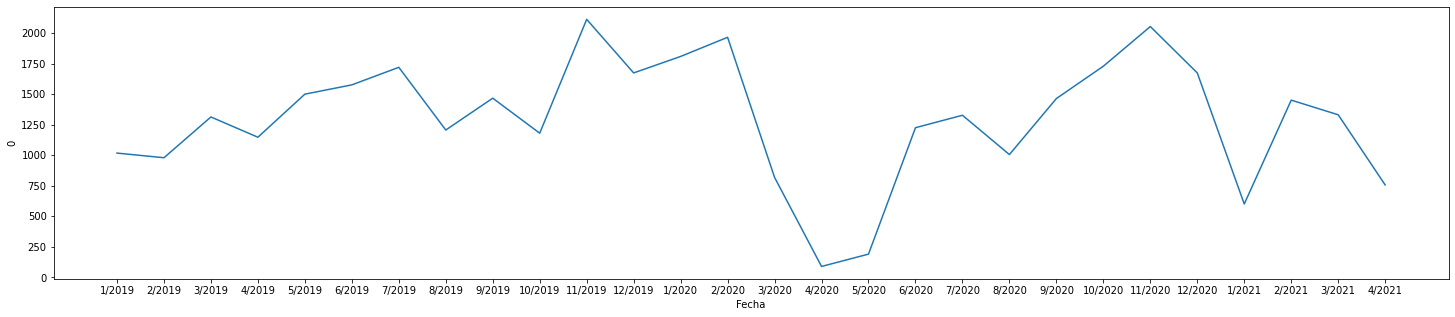

In [9]:
salesDates = pd.concat([mergedDF["Fecha"].dt.month,mergedDF["Fecha"].dt.year],axis = 1)
salesDates = salesDates.set_axis(['Mes', 'Anio'], axis=1)
salesDates = salesDates.groupby(by=["Mes", "Anio"]).size().to_frame().reset_index()
salesDates = salesDates.sort_values(by=["Anio","Mes"])
salesDates["Fecha"] = salesDates.apply(lambda x: str(x["Mes"])+"/"+str(x["Anio"]) ,axis=1)
fig, axes = plt.subplots(1, 1,figsize=(25,5))
sns.lineplot(data=salesDates, x="Fecha", y=0)

<AxesSubplot:xlabel='Mes', ylabel='0'>

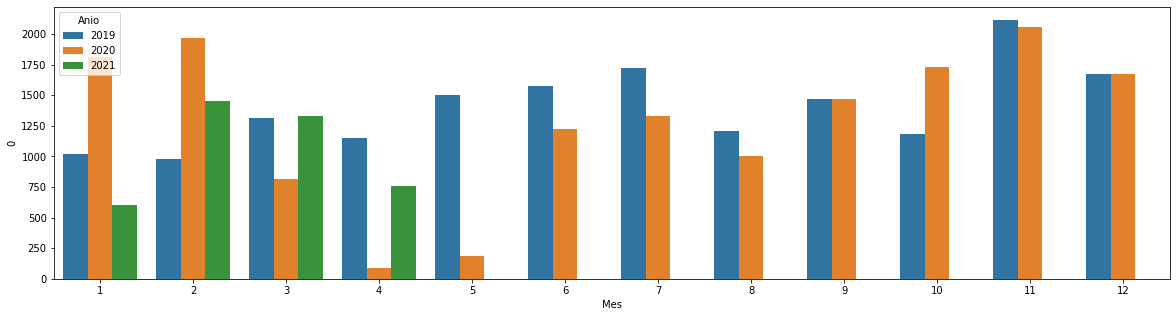

In [10]:
fig, axes = plt.subplots(1, 1,figsize=(20,5))
sns.barplot(data=salesDates, x="Mes", y=0, hue="Anio")

## Sin discriminar epoca covid

<AxesSubplot:xlabel='Mes', ylabel='Count'>

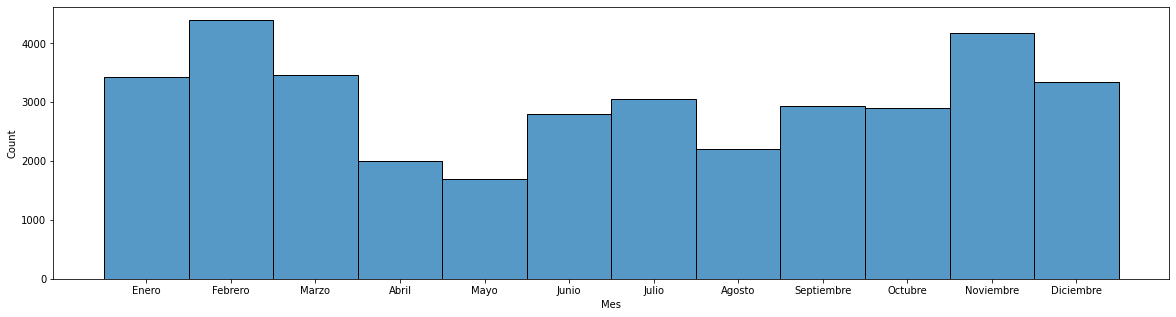

In [11]:
monthDayConv = {1:"Enero",2:"Febrero",3:"Marzo",4:"Abril",5:"Mayo",6:"Junio",7:"Julio",8:"Agosto",9:"Septiembre",10:"Octubre",11:"Noviembre",12:"Diciembre"}
mergedDF["Mes"] = mergedDF["Fecha"].dt.month
mergedDF = mergedDF.sort_values(by="Mes")
mergedDF["Mes"] = mergedDF["Mes"].replace(monthDayConv)
fig, axes = plt.subplots(1, 1,figsize=(20,5))
sns.histplot(x="Mes", data=mergedDF)

<AxesSubplot:xlabel='Mes', ylabel='0'>

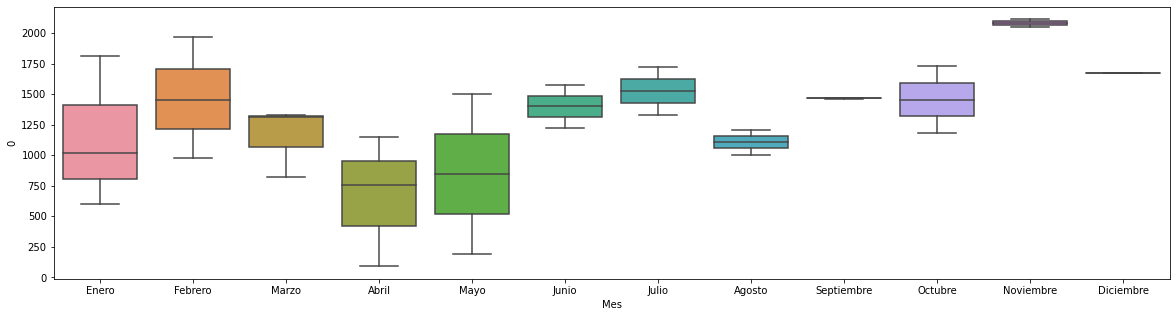

In [12]:
mergedDF["Anio"] = mergedDF["Fecha"].dt.year
mergedDF["Mes"] = mergedDF["Fecha"].dt.month
salesMonthYear = mergedDF[["Mes","Anio"]].value_counts().to_frame().reset_index()
salesMonthYear = salesMonthYear.sort_values(by="Mes")
salesMonthYear["Mes"] = salesMonthYear["Mes"].replace(monthDayConv)
fig, axes = plt.subplots(1, 1,figsize=(20,5))
sns.boxplot(x="Mes", y=0, data=salesMonthYear)

<AxesSubplot:xlabel='DiaSemana', ylabel='Count'>

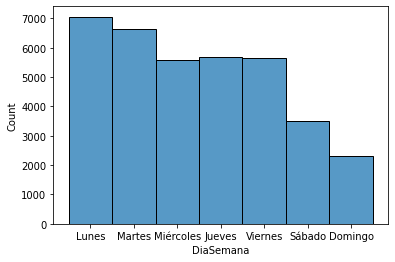

In [13]:
weekDayConv = {0:"Lunes",1:"Martes",2:"Miércoles",3:"Jueves",4:"Viernes",5:"Sábado",6:"Domingo"}
mergedDF["DiaSemana"] = mergedDF["Fecha"].dt.weekday
mergedDF = mergedDF.sort_values(by="DiaSemana")
mergedDF["DiaSemana"] = mergedDF["DiaSemana"].replace(weekDayConv)
sns.histplot(x="DiaSemana", data=mergedDF)

<AxesSubplot:xlabel='IntervaloFecha', ylabel='Count'>

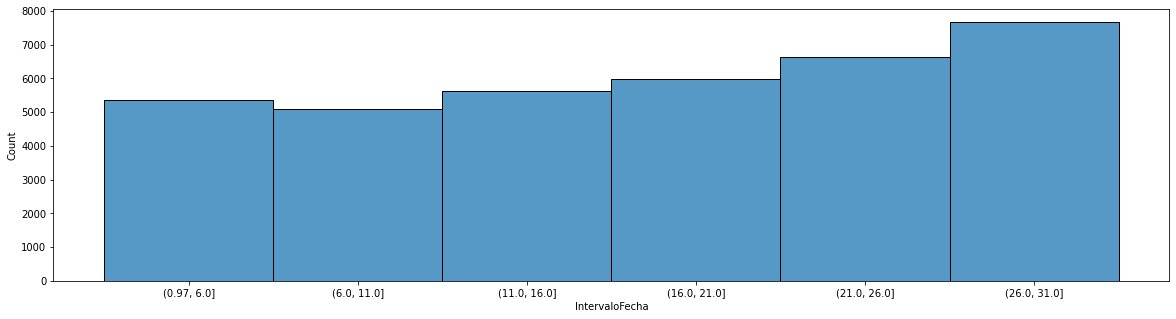

In [14]:
mergedDF["IntervaloFecha"] = pd.cut(mergedDF["Fecha"].dt.day,6)
mergedDF = mergedDF.sort_values(by="IntervaloFecha")
mergedDF["IntervaloFecha"] = mergedDF["IntervaloFecha"].astype(str)
fig, axes = plt.subplots(1, 1,figsize=(20,5))
sns.histplot(x="IntervaloFecha", data=mergedDF)

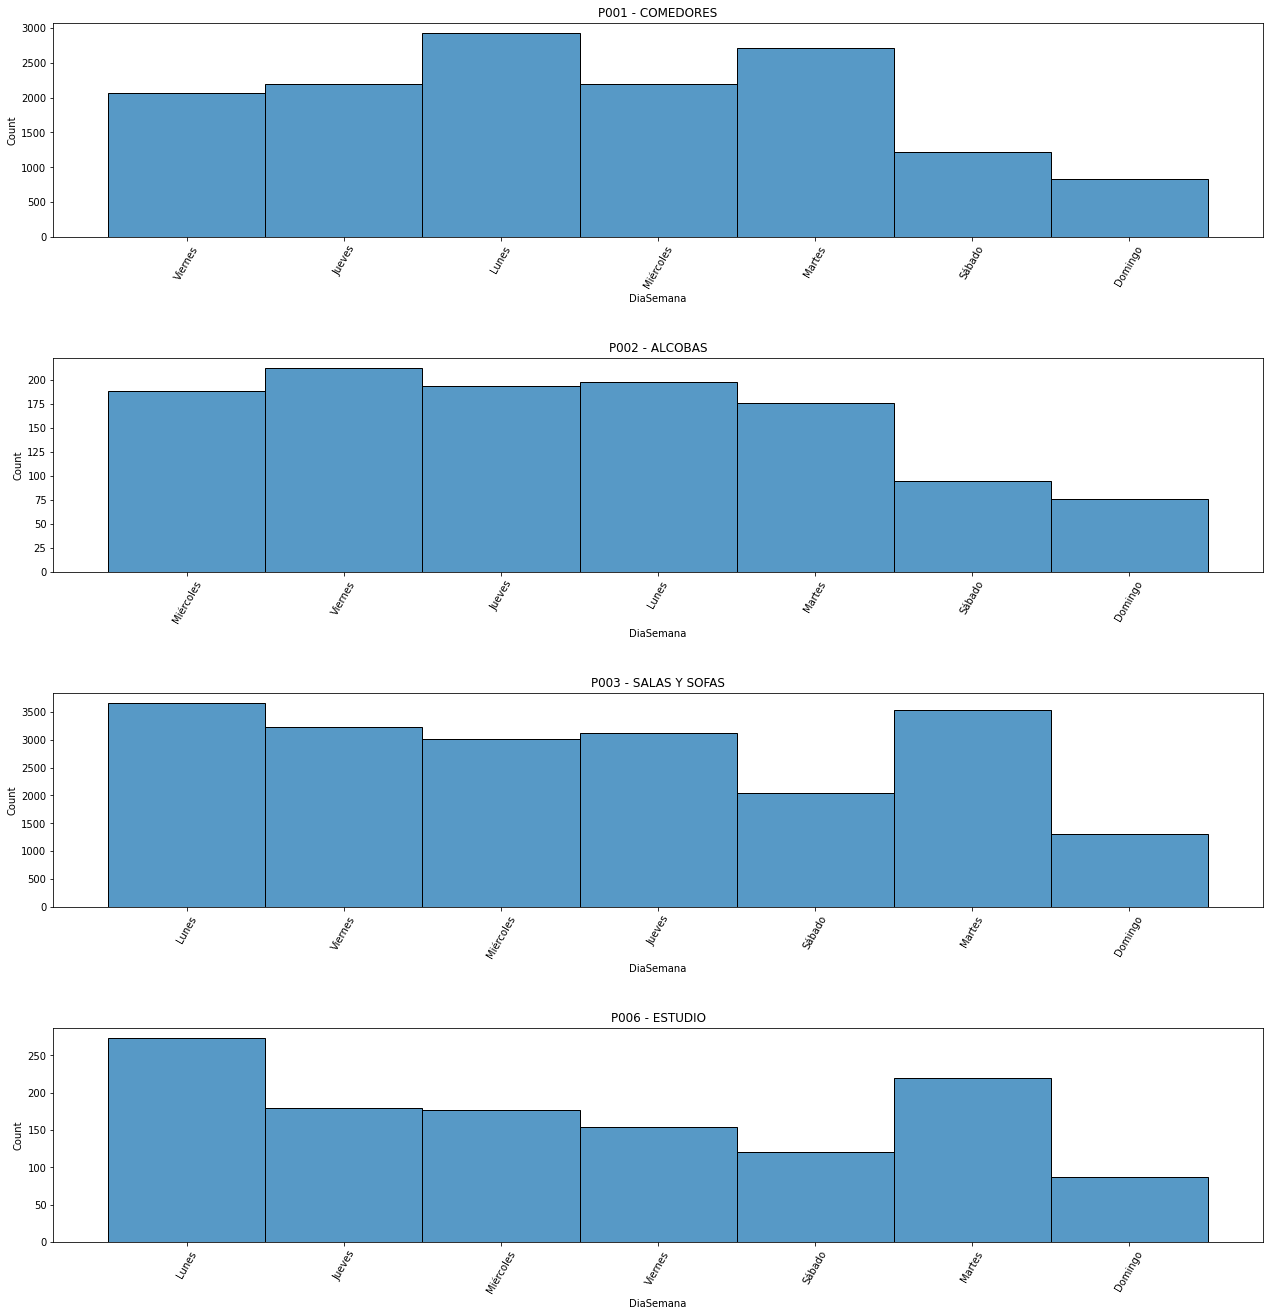

In [15]:
selectedSub = None
counter = 0
fig, axes = plt.subplots(len(departments), 1,figsize=(20,20))
fig.tight_layout(pad=10.0)
plot = None
for i in departments:
    selectedSub = mergedDF[mergedDF["DEPARTAMENTO"]==i]
    plot=sns.histplot(ax=axes[counter],x="DiaSemana", data=selectedSub)
    plot.set(title=i)
    plt.setp(plot.get_xticklabels(), rotation=60)
    counter += 1

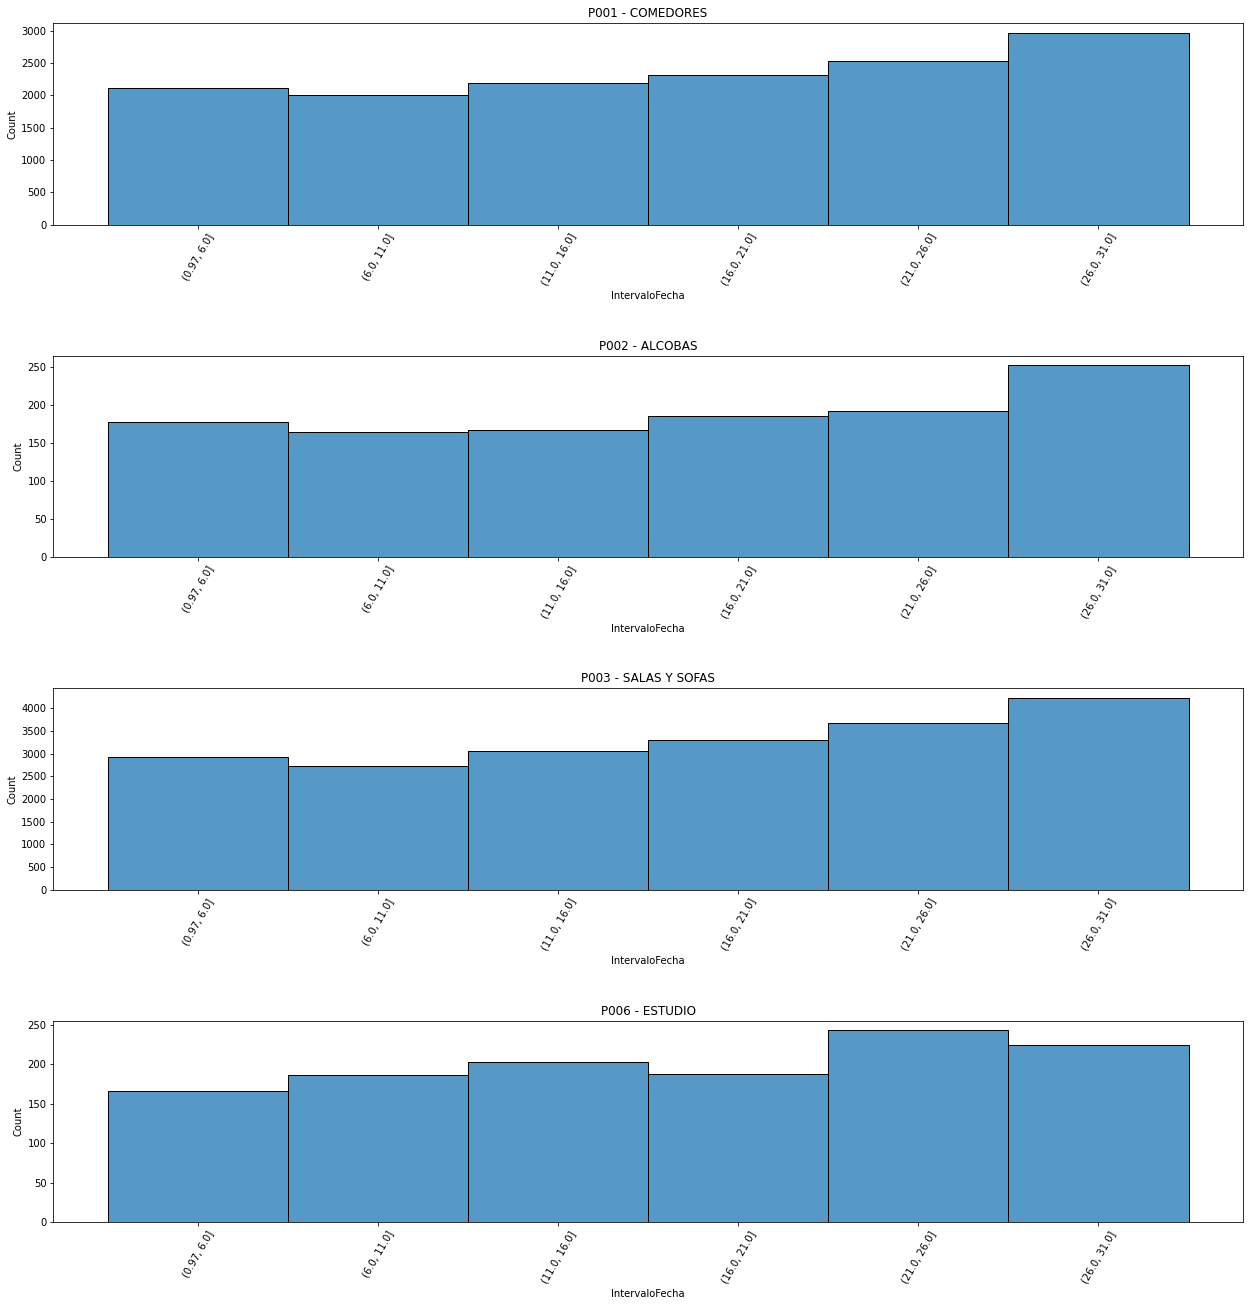

In [16]:
selectedSub = None
counter = 0
fig, axes = plt.subplots(len(departments), 1,figsize=(20,20))
fig.tight_layout(pad=11.0)
plot = None
for i in departments:
    selectedSub = mergedDF[mergedDF["DEPARTAMENTO"]==i]
    plot=sns.histplot(ax=axes[counter],x="IntervaloFecha", data=selectedSub)
    plot.set(title=i)
    plt.setp(plot.get_xticklabels(), rotation=60)
    counter += 1

## Discriminando por epoca covid

In [17]:
mergedDF.head()

,C.O.,Desc. C.O.,REF_Combinada,Nro documento,Fecha,Cantidad inv.,Suma de Vlr_Bruto,Suma de Vlr_Subtotal,Item,Desc. item,...,001-ANCHO EXHIBIDO,001-FONDO EXHIBIDO,001-MATERIAL PPAL,001-ACABADO,COLOR DEF,Puestos,Mes,Anio,DiaSemana,IntervaloFecha
5672,100,PUNTO DE VENTA AV 68,XA0714:00036:,FVP-00020494,2019-05-06,1,1384864,665546,18213,SOFA RECLINO TINAY 2P BG,...,205.0,80.0,Sintético,Superficies mates,BEIGE,2 Puestos,5,2019,Lunes,"(0.97, 6.0]"
11685,903,PAGINA WEB FIOTTI,D00510:00134:00134,FVP-00001492,2020-07-03,1,557311,557311,17741,SALA EN L PETIT DERECHA 2C,...,182.0,145.0,Poliéster,Textiles suaves,ROJO,3 Puestos,7,2020,Viernes,"(0.97, 6.0]"
7257,102,PUNTO DE VENTA CENTRO MAYOR,XZ0478:00005:,FVP-00006159,2019-03-01,6,1173060,351918,1429,SILLA COMEDOR JAMIE NG 2C LIQUIDACIÓN,...,44.0,35.0,Sintético,Superficies mates,NEGRO,1 Puesto,3,2019,Viernes,"(0.97, 6.0]"
6297,203,PUNTO DE VENTA CALI,XY0086:00005:,FVP-00003736,2019-07-05,1,375971,75194,5518,MESA AUXILIAR DIVO 650X650 NG 2C,...,65.0,65.0,Vidrio,brillante,NEGRO,No Aplica,7,2019,Viernes,"(0.97, 6.0]"
15444,100,PUNTO DE VENTA AV 68,D00963:00115:00115,FVP-00024733,2019-12-04,1,1124104,624538,15033,SOFA SHAY 2P,...,152.0,82.0,Microfibra,Textiles suaves,CAFE,2 Puestos,12,2019,Miércoles,"(0.97, 6.0]"


In [18]:
mergedDF["Covid"] = mergedDF["Fecha"]> "2020-03-01"

[Text(0.5, 1.0, 'Sales by month after covid')]

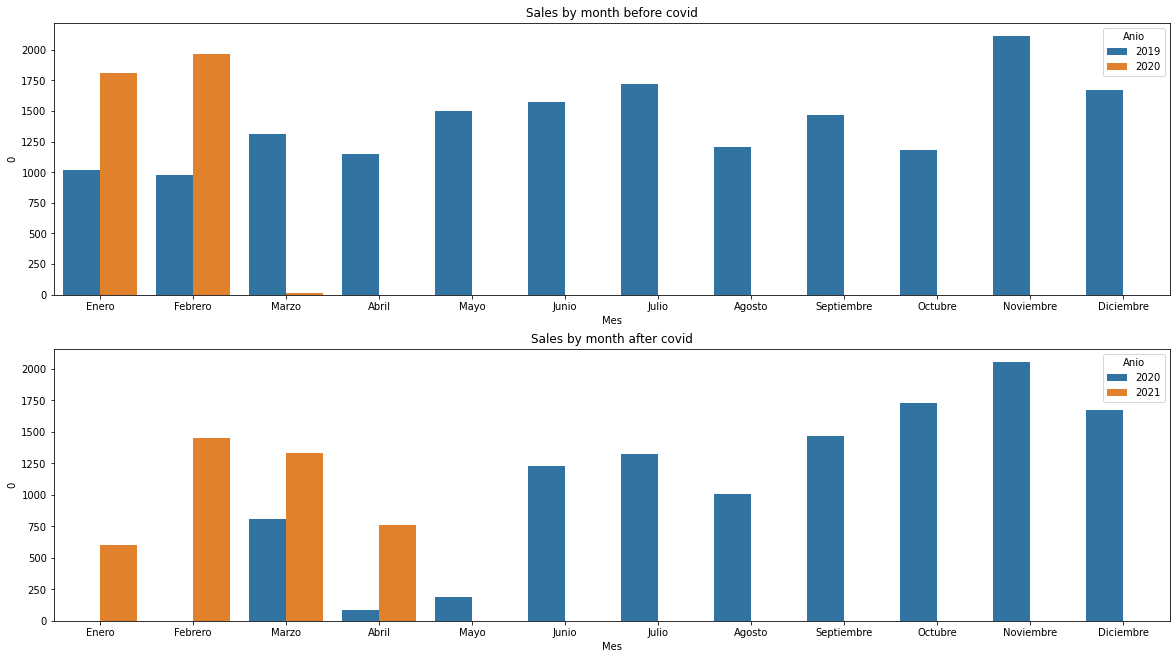

In [19]:
monthsYearCovidDf = mergedDF.groupby(by=["Mes", "Anio","Covid"]).size().to_frame().reset_index()
monthsYearCovidDf["Mes"] = monthsYearCovidDf["Mes"].replace(monthDayConv)
fig, axes = plt.subplots(2, 1,figsize=(20,11))
plot = sns.barplot(ax=axes[0],data=monthsYearCovidDf[monthsYearCovidDf["Covid"]==False], x="Mes", y=0, hue="Anio")
plot.set(title="Sales by month before covid")
plot = sns.barplot(ax=axes[1],data=monthsYearCovidDf[monthsYearCovidDf["Covid"]==True], x="Mes", y=0, hue="Anio")
plot.set(title="Sales by month after covid")

### Correlacion a partir de un bit vector

In [20]:
salesSubCat = mergedDF.groupby(by=["DEPARTAMENTO", "SUBCATEGORIA"]).size().to_frame().reset_index()

In [21]:
concatDept= pd.concat([salesSubCat["DEPARTAMENTO"],salesSubCat[0]],axis=1)
corrSalesDept = pd.get_dummies(concatDept, columns = ["DEPARTAMENTO"]).corr("pearson")
corrSalesDept=corrSalesDept.rename(columns={0: 'Sales'},index={0:"Sales"})
corrSalesDept

,Sales,DEPARTAMENTO_P001 - COMEDORES,DEPARTAMENTO_P002 - ALCOBAS,DEPARTAMENTO_P003 - SALAS Y SOFAS,DEPARTAMENTO_P006 - ESTUDIO
Sales,1.000000,0.225547,-0.327803,0.149174,-0.137447
DEPARTAMENTO_P001 - COMEDORES,0.225547,1.000000,-0.304408,-0.526235,-0.178588
DEPARTAMENTO_P002 - ALCOBAS,-0.327803,-0.304408,1.000000,-0.467221,-0.158560
DEPARTAMENTO_P003 - SALAS Y SOFAS,0.149174,-0.526235,-0.467221,1.000000,-0.274106
DEPARTAMENTO_P006 - ESTUDIO,-0.137447,-0.178588,-0.158560,-0.274106,1.000000


In [22]:
corrSalesDept[corrSalesDept["Sales"]>0.0].sort_values(by="Sales",ascending=False)

,Sales,DEPARTAMENTO_P001 - COMEDORES,DEPARTAMENTO_P002 - ALCOBAS,DEPARTAMENTO_P003 - SALAS Y SOFAS,DEPARTAMENTO_P006 - ESTUDIO
Sales,1.000000,0.225547,-0.327803,0.149174,-0.137447
DEPARTAMENTO_P001 - COMEDORES,0.225547,1.000000,-0.304408,-0.526235,-0.178588
DEPARTAMENTO_P003 - SALAS Y SOFAS,0.149174,-0.526235,-0.467221,1.000000,-0.274106


In [23]:
concatSubCat= pd.concat([salesSubCat["SUBCATEGORIA"],salesSubCat[0]],axis=1)
corrSalesSubCat = pd.get_dummies(concatSubCat, columns = ["SUBCATEGORIA"]).corr("pearson")
corrSalesSubCat=corrSalesSubCat.rename(columns={0: 'Sales'},index={0:"Sales"})
corrSalesSubCat

,Sales,SUBCATEGORIA_ARMA - ARMARIO,SUBCATEGORIA_BCAM - BASE CAMA DOBLE,SUBCATEGORIA_BIBL - BIBLIOTECAS,SUBCATEGORIA_BIFT - BIFFET,SUBCATEGORIA_BUTA - BUTACO,SUBCATEGORIA_CABT - TAPIZADOS,SUBCATEGORIA_CAMA - CAMA,SUBCATEGORIA_CAMD - CAMA DOBLE,SUBCATEGORIA_CAMS - CAMA SENCILLA,...,SUBCATEGORIA_SET4 - SET 4P,SUBCATEGORIA_SET6 - SET 6P,SUBCATEGORIA_SFCA - SOFA CAMA ABATIBLE,SUBCATEGORIA_SFCL - SOFA CAMA EN L,SUBCATEGORIA_SILL - SILLAS DE COMEDOR,SUBCATEGORIA_SILO - SILLAS DE OFICINA,SUBCATEGORIA_SOF2 - SOFA 2P,SUBCATEGORIA_SOFA - SOFA 3P,SUBCATEGORIA_SOFC - SOFACAMAS,SUBCATEGORIA_SOFL - SOFAS L
Sales,1.000000,-0.101366,-0.065917,-0.078859,-0.142826,-0.106290,-0.092645,-0.101929,-0.066199,-0.099116,...,0.577789,0.123425,0.007322,-0.099256,0.367487,-0.087721,0.159858,0.174628,-0.095317,-0.037643
SUBCATEGORIA_ARMA - ARMARIO,-0.101366,1.000000,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
SUBCATEGORIA_BCAM - BASE CAMA DOBLE,-0.065917,-0.021739,1.000000,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
SUBCATEGORIA_BIBL - BIBLIOTECAS,-0.078859,-0.021739,-0.021739,1.000000,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
SUBCATEGORIA_BIFT - BIFFET,-0.142826,-0.031083,-0.031083,-0.031083,1.000000,-0.031083,-0.031083,-0.031083,-0.031083,-0.031083,...,-0.031083,-0.031083,-0.044444,-0.031083,-0.031083,-0.031083,-0.031083,-0.031083,-0.031083,-0.031083
SUBCATEGORIA_BUTA - BUTACO,-0.106290,-0.021739,-0.021739,-0.021739,-0.031083,1.000000,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
SUBCATEGORIA_CABT - TAPIZADOS,-0.092645,-0.021739,-0.021739,-0.021739,-0.031083,-0.021739,1.000000,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
SUBCATEGORIA_CAMA - CAMA,-0.101929,-0.021739,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,1.000000,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
SUBCATEGORIA_CAMD - CAMA DOBLE,-0.066199,-0.021739,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,1.000000,-0.021739,...,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
SUBCATEGORIA_CAMS - CAMA SENCILLA,-0.099116,-0.021739,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,1.000000,...,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739


In [24]:
corrSalesSubCat[corrSalesSubCat["Sales"]>0.0].sort_values(by="Sales",ascending=False)

,Sales,SUBCATEGORIA_ARMA - ARMARIO,SUBCATEGORIA_BCAM - BASE CAMA DOBLE,SUBCATEGORIA_BIBL - BIBLIOTECAS,SUBCATEGORIA_BIFT - BIFFET,SUBCATEGORIA_BUTA - BUTACO,SUBCATEGORIA_CABT - TAPIZADOS,SUBCATEGORIA_CAMA - CAMA,SUBCATEGORIA_CAMD - CAMA DOBLE,SUBCATEGORIA_CAMS - CAMA SENCILLA,...,SUBCATEGORIA_SET4 - SET 4P,SUBCATEGORIA_SET6 - SET 6P,SUBCATEGORIA_SFCA - SOFA CAMA ABATIBLE,SUBCATEGORIA_SFCL - SOFA CAMA EN L,SUBCATEGORIA_SILL - SILLAS DE COMEDOR,SUBCATEGORIA_SILO - SILLAS DE OFICINA,SUBCATEGORIA_SOF2 - SOFA 2P,SUBCATEGORIA_SOFA - SOFA 3P,SUBCATEGORIA_SOFC - SOFACAMAS,SUBCATEGORIA_SOFL - SOFAS L
Sales,1.000000,-0.101366,-0.065917,-0.078859,-0.142826,-0.106290,-0.092645,-0.101929,-0.066199,-0.099116,...,0.577789,0.123425,0.007322,-0.099256,0.367487,-0.087721,0.159858,0.174628,-0.095317,-0.037643
SUBCATEGORIA_SET4 - SET 4P,0.577789,-0.021739,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,1.000000,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
SUBCATEGORIA_SILL - SILLAS DE COMEDOR,0.367487,-0.021739,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.031083,-0.021739,1.000000,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
SUBCATEGORIA_RECL - RECLINABLES,0.326974,-0.021739,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
SUBCATEGORIA_SOFA - SOFA 3P,0.174628,-0.021739,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,1.000000,-0.021739,-0.021739
SUBCATEGORIA_RCL1 - RECLINABLES 1P,0.171112,-0.021739,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
SUBCATEGORIA_SOF2 - SOFA 2P,0.159858,-0.021739,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,1.000000,-0.021739,-0.021739,-0.021739
SUBCATEGORIA_MCET - MESAS DE CENTRO,0.134842,-0.031083,-0.031083,-0.031083,-0.044444,-0.031083,-0.031083,-0.031083,-0.031083,-0.031083,...,-0.031083,-0.031083,-0.044444,-0.031083,-0.031083,-0.031083,-0.031083,-0.031083,-0.031083,-0.031083
SUBCATEGORIA_SET6 - SET 6P,0.123425,-0.021739,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,1.000000,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
SUBCATEGORIA_MCOM - MESAS DE 4P,0.063921,-0.021739,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.031083,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739


In [25]:
concatDeptCat = (salesSubCat["DEPARTAMENTO"]+" // "+salesSubCat["SUBCATEGORIA"]).to_frame()
concatDeptCat["Sales"] = salesSubCat[0]
corrSalesDeptCat = pd.get_dummies(concatDeptCat, columns = [0]).corr("pearson")
corrSalesDeptCat

,Sales,0_P001 - COMEDORES // BIFT - BIFFET,0_P001 - COMEDORES // CONS - CONSOLAS,0_P001 - COMEDORES // MBAR - MESAS DE BAR,0_P001 - COMEDORES // MCET - MESAS DE CENTRO,0_P001 - COMEDORES // MCO6 - MESAS DE 6P,0_P001 - COMEDORES // MCOM - MESAS DE 4P,0_P001 - COMEDORES // MEXT - MESAS DE EXTENSIÓN,0_P001 - COMEDORES // SAUX - SILLAS AUXILIARES,0_P001 - COMEDORES // SBAR - SILLAS DE BAR,...,0_P003 - SALAS Y SOFAS // SFCA - SOFA CAMA ABATIBLE,0_P003 - SALAS Y SOFAS // SFCL - SOFA CAMA EN L,0_P003 - SALAS Y SOFAS // SOF2 - SOFA 2P,0_P003 - SALAS Y SOFAS // SOFA - SOFA 3P,0_P003 - SALAS Y SOFAS // SOFC - SOFACAMAS,0_P003 - SALAS Y SOFAS // SOFL - SOFAS L,0_P006 - ESTUDIO // BIBL - BIBLIOTECAS,0_P006 - ESTUDIO // ESCR - ESCRITORIOS,0_P006 - ESTUDIO // ESTA - ESTANTES,0_P006 - ESTUDIO // SILO - SILLAS DE OFICINA
Sales,1.000000,-0.091941,-0.016683,-0.045520,-0.106149,0.021017,0.063921,-0.070559,-0.064229,-0.077030,...,0.114844,-0.099256,0.159858,0.174628,-0.095317,-0.037643,-0.078859,-0.040737,-0.058462,-0.087721
0_P001 - COMEDORES // BIFT - BIFFET,-0.091941,1.000000,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P001 - COMEDORES // CONS - CONSOLAS,-0.016683,-0.021739,1.000000,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P001 - COMEDORES // MBAR - MESAS DE BAR,-0.045520,-0.021739,-0.021739,1.000000,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P001 - COMEDORES // MCET - MESAS DE CENTRO,-0.106149,-0.021739,-0.021739,-0.021739,1.000000,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P001 - COMEDORES // MCO6 - MESAS DE 6P,0.021017,-0.021739,-0.021739,-0.021739,-0.021739,1.000000,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P001 - COMEDORES // MCOM - MESAS DE 4P,0.063921,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,1.000000,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P001 - COMEDORES // MEXT - MESAS DE EXTENSIÓN,-0.070559,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,1.000000,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P001 - COMEDORES // SAUX - SILLAS AUXILIARES,-0.064229,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,1.000000,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P001 - COMEDORES // SBAR - SILLAS DE BAR,-0.077030,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,1.000000,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739


In [26]:
corrSalesDeptCat[corrSalesDeptCat["Sales"]>0.0].sort_values(by="Sales",ascending=False)

,Sales,0_P001 - COMEDORES // BIFT - BIFFET,0_P001 - COMEDORES // CONS - CONSOLAS,0_P001 - COMEDORES // MBAR - MESAS DE BAR,0_P001 - COMEDORES // MCET - MESAS DE CENTRO,0_P001 - COMEDORES // MCO6 - MESAS DE 6P,0_P001 - COMEDORES // MCOM - MESAS DE 4P,0_P001 - COMEDORES // MEXT - MESAS DE EXTENSIÓN,0_P001 - COMEDORES // SAUX - SILLAS AUXILIARES,0_P001 - COMEDORES // SBAR - SILLAS DE BAR,...,0_P003 - SALAS Y SOFAS // SFCA - SOFA CAMA ABATIBLE,0_P003 - SALAS Y SOFAS // SFCL - SOFA CAMA EN L,0_P003 - SALAS Y SOFAS // SOF2 - SOFA 2P,0_P003 - SALAS Y SOFAS // SOFA - SOFA 3P,0_P003 - SALAS Y SOFAS // SOFC - SOFACAMAS,0_P003 - SALAS Y SOFAS // SOFL - SOFAS L,0_P006 - ESTUDIO // BIBL - BIBLIOTECAS,0_P006 - ESTUDIO // ESCR - ESCRITORIOS,0_P006 - ESTUDIO // ESTA - ESTANTES,0_P006 - ESTUDIO // SILO - SILLAS DE OFICINA
Sales,1.000000,-0.091941,-0.016683,-0.045520,-0.106149,0.021017,0.063921,-0.070559,-0.064229,-0.077030,...,0.114844,-0.099256,0.159858,0.174628,-0.095317,-0.037643,-0.078859,-0.040737,-0.058462,-0.087721
0_P001 - COMEDORES // SET4 - SET 4P,0.577789,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P001 - COMEDORES // SILL - SILLAS DE COMEDOR,0.367487,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P003 - SALAS Y SOFAS // RECL - RECLINABLES,0.326974,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P003 - SALAS Y SOFAS // MCET - MESAS DE CENTRO,0.294761,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P003 - SALAS Y SOFAS // SOFA - SOFA 3P,0.174628,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,1.000000,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P003 - SALAS Y SOFAS // RCL1 - RECLINABLES 1P,0.171112,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P003 - SALAS Y SOFAS // SOF2 - SOFA 2P,0.159858,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,1.000000,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P001 - COMEDORES // SET6 - SET 6P,0.123425,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739
0_P003 - SALAS Y SOFAS // SFCA - SOFA CAMA ABATIBLE,0.114844,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,...,1.000000,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739,-0.021739


### Pareto para el 20% de subcategorias que generan el 80%

In [27]:
salesByProd = mergedDF.groupby(by="REF_Combinada").size().sort_values(ascending=False)
totalSales = salesByProd.sum()
totalSales

36406

In [28]:
pareto = totalSales*0.8
counter = 0
references = []
salesByProd = salesByProd.to_frame().reset_index()
for index, row in salesByProd.iterrows():
    counter += row[0]
    references.append(row["REF_Combinada"])
    if counter >= pareto:
        break

In [30]:
topProds = mergedDF[mergedDF["REF_Combinada"].isin(references)].groupby(by=["001-MATERIAL PPAL","001-ACABADO","COLOR DEF","ESTILO","ORIGEN","Puestos","Suma de Vlr_Subtotal"]).size().sort_values(ascending=False)

In [31]:
mergedDF["Puestos"].value_counts()

1 Puesto        9864
No Aplica       6339
3 Puestos       6221
4 Puestos       6081
2 Puestos       4344
6 Puestos       2849
4 puestos        464
Multipuestos     235
No aplica          9
Name: Puestos, dtype: int64

In [32]:
modDict = {"No aplica":"No Aplica"}
topProds = topProds.to_frame().reset_index()
topProds["Puestos"] = topProds["Puestos"].replace(modDict)
topProds

,001-MATERIAL PPAL,001-ACABADO,COLOR DEF,ESTILO,ORIGEN,Puestos,Suma de Vlr_Subtotal,0
0,Vidrio,brillante,NEGRO,MOD - MODERNO,IMP - IMPORTADO,4 puestos,134006,236
1,madera laminada,mate,GRIS,CON - CONTEMPORÁNEO,IMP - IMPORTADO,4 Puestos,402689,196
2,metal + vidrio,brillante,NEGRO,MOD - MODERNO,IMP - IMPORTADO,4 Puestos,335462,167
3,metal + vidrio,brillante,CRISTAL/NEGRO,MOD - MODERNO,IMP - IMPORTADO,6 Puestos,470582,119
4,Microfibra,Textiles suaves,CAFE,MOD - MODERNO,IMP - IMPORTADO,2 Puestos,738824,114
...,...,...,...,...,...,...,...,...
5349,Sintético,Superficies mates,CAFE,C+M - CLÁSICO + MODERNO,IMP - IMPORTADO,3 Puestos,1524646,1
5350,Sintético,Superficies mates,CAFE,CLA - CLÁSICO,IMP - IMPORTADO,1 Puesto,128000,1
5351,Sintético,Superficies mates,CAFE,CLA - CLÁSICO,IMP - IMPORTADO,1 Puesto,261515,1
5352,Sintético,Superficies mates,CAFE,CLA - CLÁSICO,IMP - IMPORTADO,1 Puesto,305407,1


In [33]:
corrSalesFactors = pd.get_dummies(topProds, columns = ["001-MATERIAL PPAL","001-ACABADO","COLOR DEF","ESTILO","ORIGEN","Puestos"]).corr("pearson")
corrSalesFactors=corrSalesFactors.rename(columns={0: 'Sales'},index={0:"Sales"})
corrSalesFactors.loc["Sales"].sort_values(ascending=False)

Sales                                1.000000
Puestos_4 Puestos                    0.107231
001-ACABADO_brillante                0.096200
001-MATERIAL PPAL_metal + vidrio     0.095715
001-MATERIAL PPAL_madera laminada    0.064835
                                       ...   
ESTILO_CLA - CLÁSICO                -0.039274
Suma de Vlr_Subtotal                -0.066435
001-ACABADO_Superficies mates       -0.091708
001-MATERIAL PPAL_Sintético         -0.093828
Puestos_1 Puesto                    -0.134532
Name: Sales, Length: 93, dtype: float64